# Task 7:

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

## Images loading:

In [2]:
# queryImage:
img1 = cv2.imread('openCV-data/putin1.png',0)  
# trainImage:
img2 = cv2.imread('openCV-data/putin2.png',0)

Text(0.5,1,'Image 2')

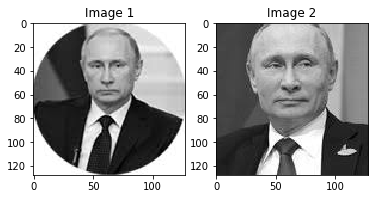

In [3]:
# Images check:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1, cmap='gray')
ax1.set_title('Image 1')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2, cmap='gray')
ax2.set_title('Image 2')

In [4]:
# Initiate SIFT detector:
sift = cv2.xfeatures2d.SIFT_create()

# Keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

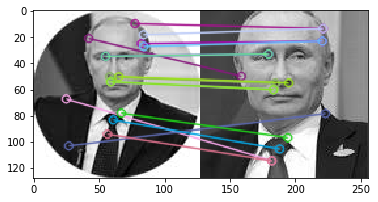

(<matplotlib.image.AxesImage at 0x1278d4978>, None)

In [5]:
# BFMatcher:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# drawMatchesKnn expects list of matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None, flags=2)
plt.imshow(img3),plt.show()

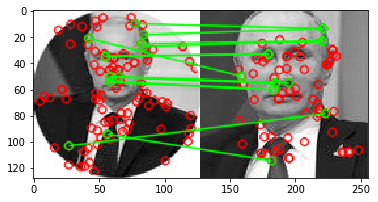

(<matplotlib.image.AxesImage at 0x12794e0b8>, None)

In [6]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Draw matches with a mask
matchesMask = [[0,0] for i in range(len(matches))]
# Lowe's ratio test (https://docs.opencv.org/3.3.0/dc/dc3/tutorial_py_matcher.html)
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

# Print matched features:
plt.imshow(img3,),plt.show()